In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf   #Auto Correlation PLOT
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
df=pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\DESKTOP_FILES\\Internship\\MonthlySales.csv',index_col=0,parse_dates=True)
print(df.head())

               sales
month               
2013-01-01  14236.90
2013-02-01   4519.89
2013-03-01  55691.01
2013-04-01  28295.35
2013-05-01  23648.29


<Axes: xlabel='month'>

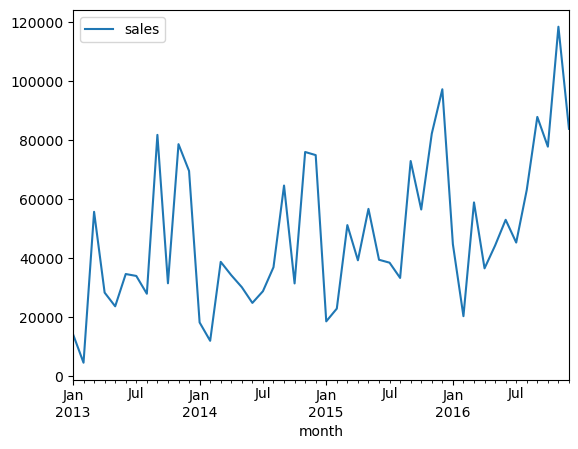

In [30]:
df.plot()

In [31]:
df=df.asfreq("MS")

In [55]:
df.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='month', freq='MS')

In [32]:
decompose=seasonal_decompose(x=df['sales'],model='additive',period=12)

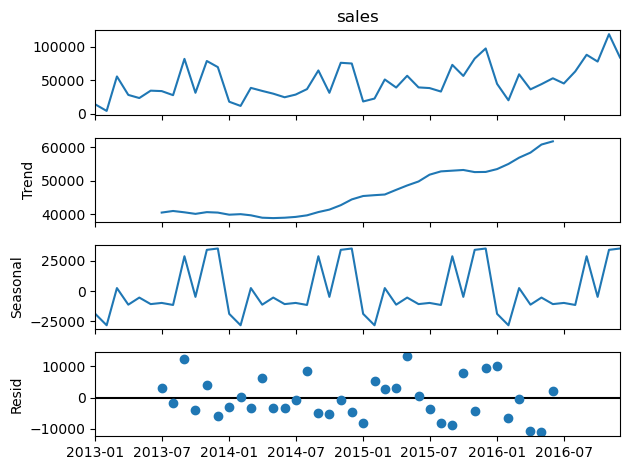

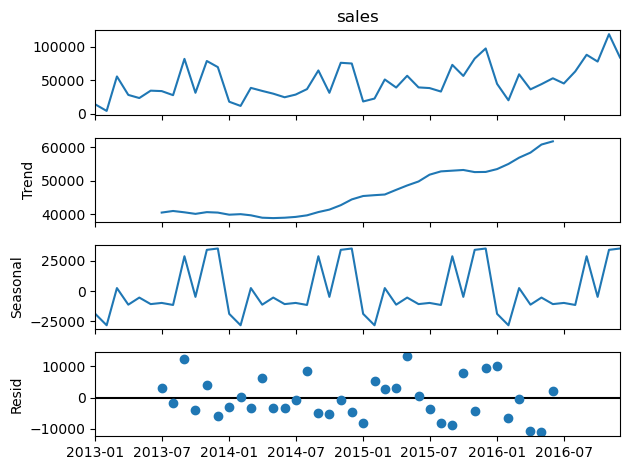

In [33]:
decompose.plot()

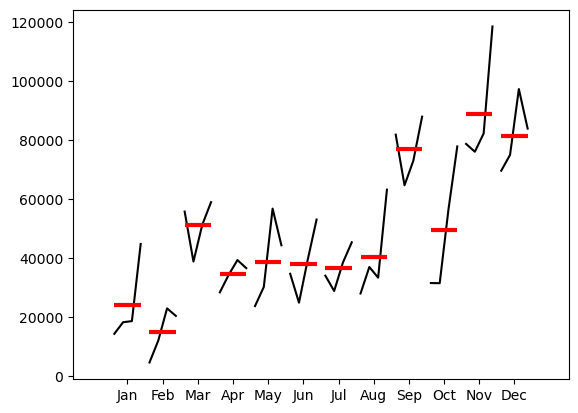

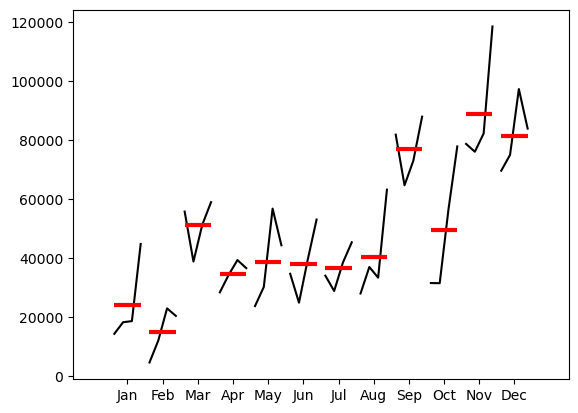

In [34]:
month_plot(df.sales)

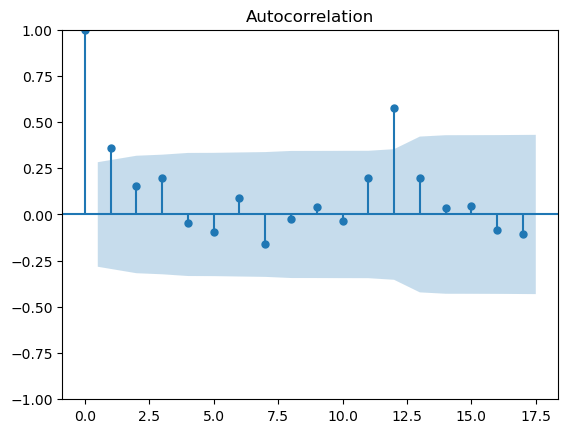

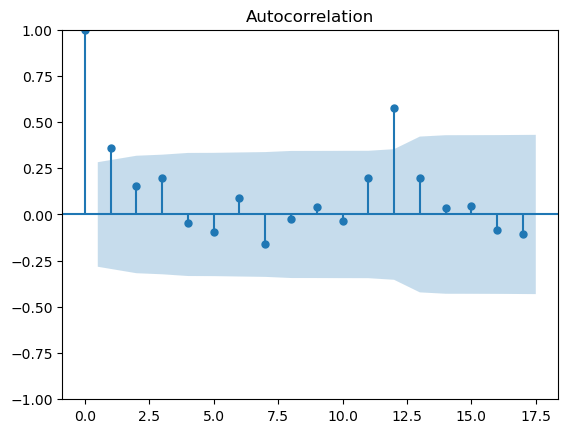

In [35]:
plot_acf(df.sales)

In [37]:
df.describe()

,sales
count,48.000000
mean,47858.351667
std,25221.124187
min,4519.890000
25%,29790.100000
50%,39339.515000
75%,65833.345000
max,118447.830000


In [136]:
training=df.iloc[0:34,:]

In [137]:

training.describe()


,sales
count,34.000000
mean,40700.709118
std,20938.093243
min,4519.890000
25%,28005.940000
50%,34395.170000
75%,56270.100000
max,81777.350000


In [138]:
testing=df.iloc[34:,:]

In [139]:
testing.describe()

,sales
count,14.000000
mean,65241.197857
std,26972.131863
min,20301.130000
25%,44843.460000
50%,60996.620000
75%,83420.070000
max,118447.830000


In [140]:
model=ExponentialSmoothing(endog=training.sales,trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [146]:
prediction=model.forecast(steps=14)


In [147]:
prediction.head()

2015-11-01    89540.876825
2015-12-01    82988.501186
2016-01-01    31012.541822
2016-02-01    27211.792853
2016-03-01    58122.224042
Freq: MS, dtype: float64

In [148]:
prediction.describe()

count       14.000000
mean     62277.602747
std      24549.088808
min      27211.792853
25%      47779.235752
50%      51645.361015
75%      87902.782915
max      99559.373817
dtype: float64

<Axes: xlabel='month'>

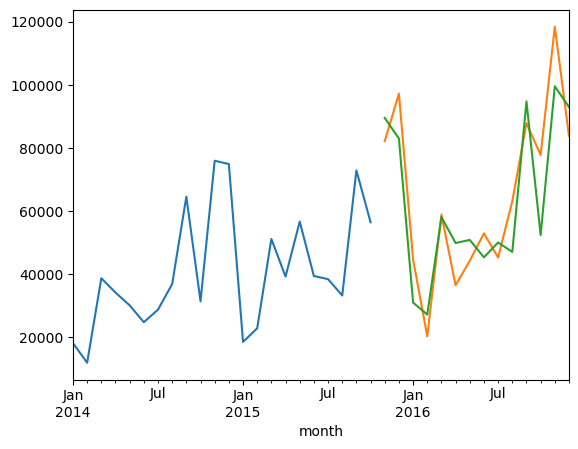

In [149]:
training['sales']['2014-01-01':].plot()
testing['sales'].plot()
prediction.plot()

In [150]:
mae=mean_absolute_error(testing,prediction)

In [151]:
mae

10837.625953844368

In [152]:
mae=mae*0.1

In [153]:
mae

1083.762595384437